In [1]:
# numpy for numerical analysis
import numpy as np

# pandas to process the data in the dataframe
import pandas as pd
pd.plotting.register_matplotlib_converters()

# matplotlib for basic visulaisation
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

C:\Users\Sameer\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the variable into the dataset
df = pd.read_csv(r"Video_Games_Sales_as_at_22_Dec_2016.csv", encoding='ISO-8859-1')

# The Dataset (Iteration 1 Part 1)

For the this project we will be working with data about video game sales. The data set has 14 different attributes with around 16000 entries.

In [3]:
# Iteration 1 Part 1
# Shows the number of rows and columns.
df.shape

(16717, 14)

In [4]:
# Iteration 1 Part 1
# Prints out the first 5 items in the DF
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,Rating
0,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00,NaN,NaN,NaN,NaN
1,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN
2,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN
3,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN
4,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN




As mentioned the dataset has 14 attributes and below are names, units if applicable and a short explanation for them along with the reason(s) for including them in the dataset:

<ul>
    <li>Name - The video game title, attribute need to identify the game</li>
    <li>Platform - Platforms on which the game was released, attribute can help identify if platform type effect game sales</li>
    <li>Year_of_Release - The release year of the game, attribute can help learn how game sales have changed over the years</li>
    <li>Genre - Game genre, attribute can help learn if certain genres are more popular than others</li>
    <li>Publisher - The publisher of the game, attribute can help us learn if the publisher effect user's game preference</li>
    <li>NA_Sales - North American sales of the game in millions, one of the main attribute for anyalyzing game sales and analyze if region has an effect on game sales</li>
    <li>EU_Sales - European sales of the game in millions, one of the main attribute for anyalyzing game sales and analyze if region has an effect on game sales</li>
    <li>JP_Sales - Janpan sales of the game in millions, one of the main attribute for anyalyzing game sales and analyze if region has an effect on game sales</li>
    <li>Other_Sales - Rest of the world sales of the game in millions, one of the main attribute for anyalyzing game sales and analyze if region has an effect on game sales</li>
    <li>Global_Sales -Total sales of the game in million, one of the main attribute for anyalyzing game saless</li>
    <li>Critic_Score - Mean score given to the game by critics out of 100, as our main focus is on sales of the game, we can remove tis attribute from the dataframe</li>
    <li>Critic_Count - Number of critcs that scored the game, as our main focus is on sales of the game, we can remove tis attribute from the dataframe</li>
    <li>Developer - The developer of the game, as our main focus is on sales of the game, we can remove tis attribute from the dataframe</li>
    <li>Rating - ESRB rating of the game, as our main focus is on sales of the game, we can remove tis attribute from the dataframe</li>
</ul>

In [5]:
# Iteration 1 Part 1
# Deleting the unwanted columns in the DF
del(df['Critic_Score'])
del(df['Critic_Count'])
del(df['Developer'])
del(df['Rating'])
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00
1,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03
2,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68
3,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60
4,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52
...,...,...,...,...,...,...,...,...,...,...
16712,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,0.00,0.16,0.00,0.02,0.18
16713,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24
16714,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,0.11,0.10,0.00,0.02,0.22
16715,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,0.00,0.00,0.02,0.00,0.02








All the numeric attributes are stored float datatype while all the character descriptors are stored as object datatype. The table below decribes the data types for each attribute:

In [6]:
# Iteration 1 Part 1
# Prints information about the DF including column names and datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


### Small Summary of Sales Data

In [7]:
# Iteration 1 Part 1
# Generating descriptive statistics for all the sales columns
df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000
mean,0.263255,0.145010,0.077610,0.047333,0.533462
std,0.813475,0.503303,0.308836,0.186721,1.547956
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.530000


The data above descriptive statisitcs are generated to understand the distribution of the sales data. This small summary of data show that the data is clearly positively skewed as the mean of all columns mentioned in the statistical description above is greater than the third quartile.

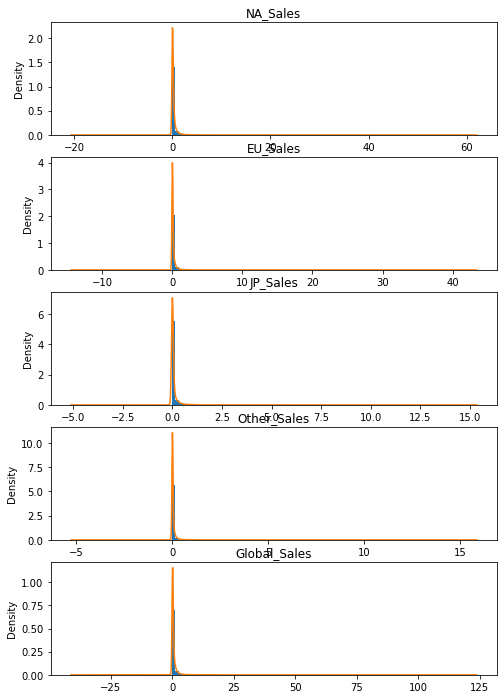

In [8]:
# Iteration 1 Part 1
# List of columns we want to plot
val_cols_names = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
## Function to generate histogram plots of the density of our sales data
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(8,12))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i],bins=64,density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df, val_cols_names)

The plots above have been plotted to visualise the distribution of the sales data. As previously mentioned and visible above, the data has a very strong positve skew. Moving on, we will also create boxplots for our continous data to have a glimpse of the outliers in our data. As our data is skewed, it is fair to assume that our plots will show quite a few outliers.

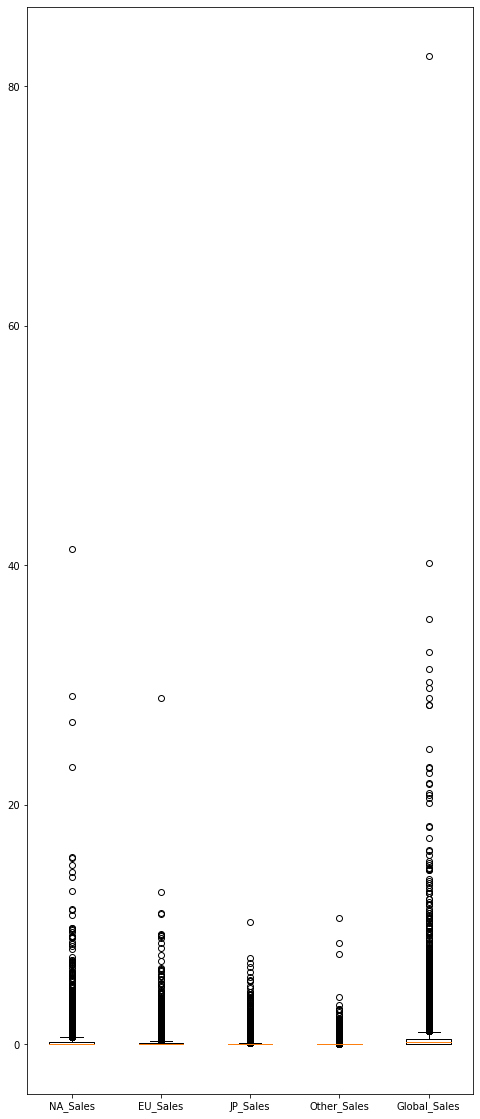

In [9]:
# Iteration 1 Part 1
# List of columns we want to plot
val_cols_names = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']
box_vals = [df['NA_Sales'], df['EU_Sales'], df['JP_Sales'],df['Other_Sales'], df['Global_Sales']]

fig, axs = plt.subplots(1, 1, figsize=(8, 20))

axs.boxplot(box_vals, labels=val_cols_names)

plt.show()

As predicted, our data does have quite a few outliers, whether these outliers are due to some error or are genuine values is discussed in part 2 of iteration 1.

### Small Summary of Categorical Data

We will now look at the distribution of our four categorical features which are 'Platform', 'Year Of Release', 'Genre' and 'Publisher'. We will use a bar a chart to look for the most frequent occourences in each of these categories. 

The bar chart for platform: 


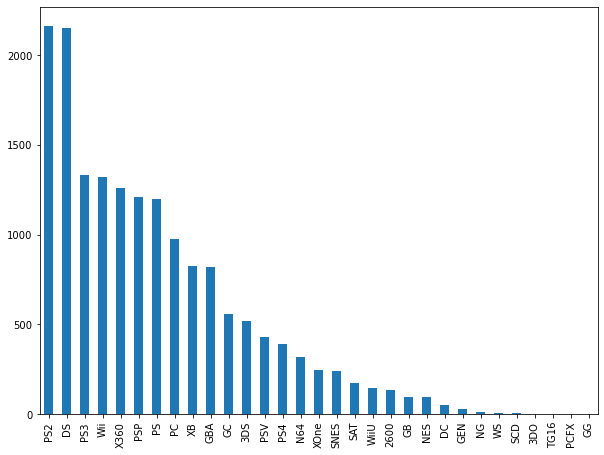

In [10]:
# Iteration 1 Part 1
print('The bar chart for ''platform'': ')
df['Platform'].value_counts().plot(kind='bar', figsize=(10, 7.5))
plt.show()

As seen above the most frequent platforms is DS with PS2 closely behind it. Platforms like SCD, WS, 3DO, TG16, GG and PCFX are also present but in negligible amount.

The bar chart for our next categorical field, year of release, is shown below: 


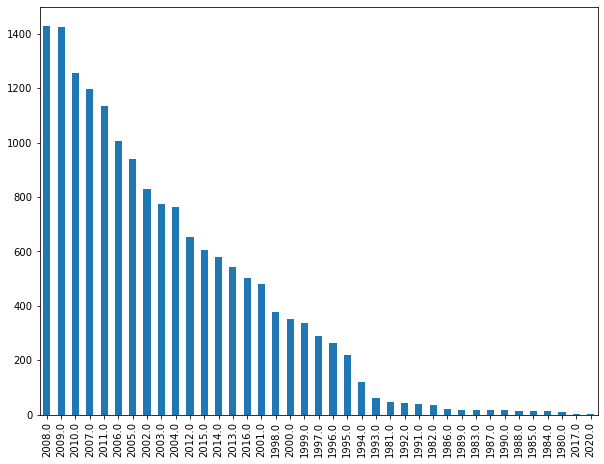

In [11]:
# Iteration 1 Part 1
print('The bar chart for our next categorical field, ''year of release'', is shown below: ')
df['Year_of_Release'].value_counts().plot(kind='bar',figsize=(10, 7.5))
plt.show()

As seen above, most of the games in our dataset are from the year 2008. In general, the recent years have more games compared to the earlier years. The only exception to this are the years 2017 and 2020.

The next field is genre and its plot is shown below: 


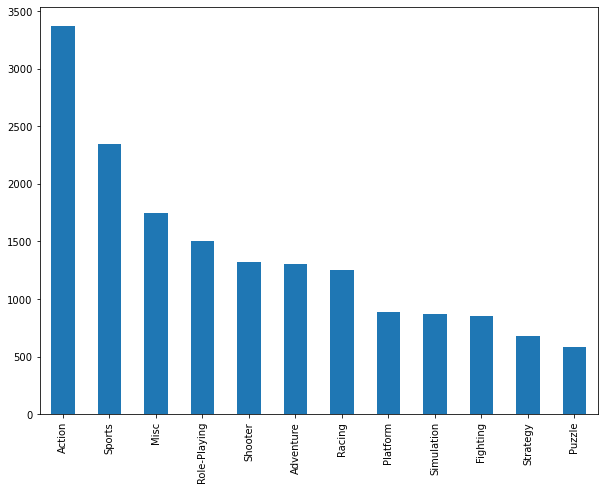

In [12]:
# Iteration 1 Part 1
print('The next field is genre and its plot is shown below: ')
df['Genre'].value_counts().plot(kind='bar',figsize=(10, 7.5))
plt.show()

As apparent in our plot, the most popular genre is action with more than 2500 entries while the least popular genre is puzzle. 

Our final categorical field is publisher. This field has most number of unique values, therefore, ploting all of them is not feasable. Hovwever, the chart below shows the 10 platforms with most publications:


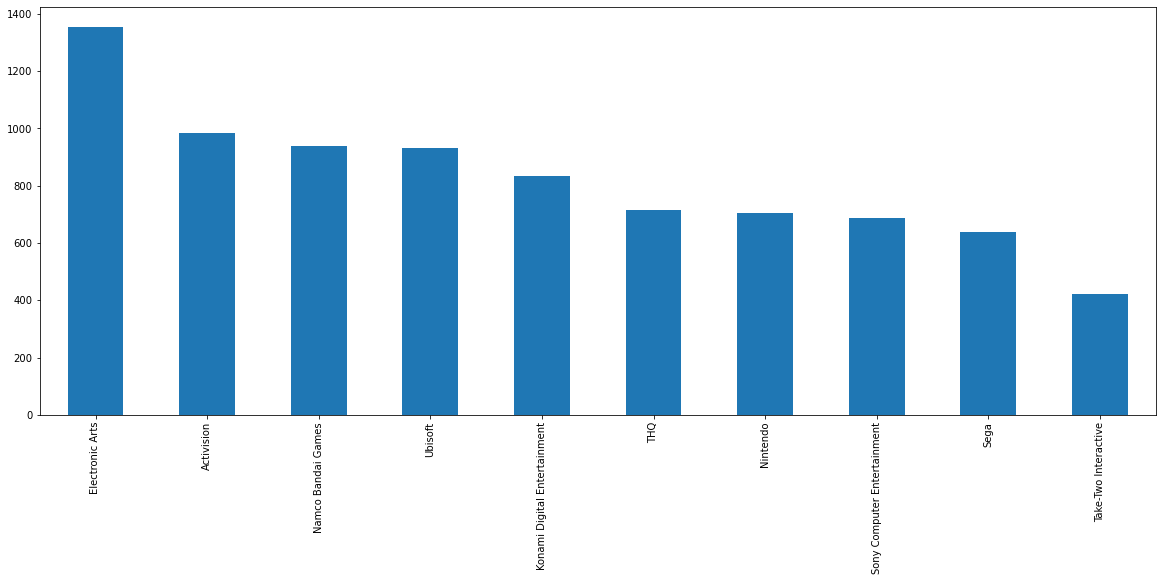

In [13]:
# Iteration 1 Part 1
print('Our final categorical field is publisher. This field has most number of unique values, therefore, ploting all of them is not feasable. Hovwever, the chart below shows the 10 platforms with most publications:')
df['Publisher'].value_counts().head(10).plot(kind='bar',figsize=(20, 7.5))
plt.show()

Electronics Arts is leading here with over 1000 entries, however, the other 9 publishers are not long way behind with all having 600-800 entries.

## Data Cleaning (Iteration 1 Part 2)

### Outliers

As previously concluded, our data has a very strong positive skew and the skewness of our data is:

In [14]:
# Iteration 1 Part 2
#Printing the skewnes of out Global_Sales data
df['Global_Sales'].skew()

17.379414082230085

The skewness can be a result of either error in data collection or could be result of high sales of some of the best games of all time. A search for some of the most sold games fetches the following results:

In [15]:
# Iteration 1 Part 2
#This fetches the list of 15 most sold games
df.sort_values('Global_Sales', ascending=False)[:15]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15993,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
13500,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
7909,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
15995,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
10610,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
13976,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9629,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
15991,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
9632,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
3751,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


The results show games that are some of the most popular and best games of all time, therefore, the high sale values are not due to error but are actually genuine. These enteries are relevant to our analysis of game sales, however, for the sake of this assignment we will remove some 'outliers' from the dataset for now. To satisfy the requirement of the assingment we will reomve all values below 1st or above 99th percentile.

In [16]:
# Iteration 1 Part 2
low_lim=df['Global_Sales'].quantile(0.01)
high_lim=df['Global_Sales'].quantile(0.99)

outliers = df[(df['Global_Sales'] >= high_lim) | (df['Global_Sales'] <= low_lim)]

df = df[df['Global_Sales'].between(low_lim,high_lim)]
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00
1,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03
2,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68
3,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60
4,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52
...,...,...,...,...,...,...,...,...,...,...
16712,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,0.00,0.16,0.00,0.02,0.18
16713,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,0.17,0.05,0.00,0.02,0.24
16714,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,0.11,0.10,0.00,0.02,0.22
16715,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,0.00,0.00,0.02,0.00,0.02


The skewness and the histogram of the Global_Sales column is shown below. Even after, removing the outliers, the data is still has a strong positive skewness. As mentioned before, these values are not due to error but due to high sales of some games.

In [17]:
# Iteration 1 Part 2
#Printing the skewnes of out Global_Sales data
df['Global_Sales'].skew()

3.4273302771491685

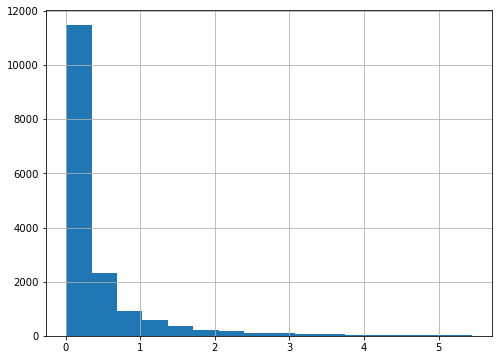

In [18]:
# Iteration 1 Part 2
#Generates histogram for Global_sales
hist = df['Global_Sales'].hist(bins=16,figsize=(8, 6))

### Missing Values

The following table shows entries with missing data or null values:

In [19]:
# Iteration 1 Part 2
## Printing out total number of null values in each column
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

Although our data has some missing values, we will randomly generate some more missing values to meet the "10-20% of missing values in atleast 2 columns" assignment requirment. To meet this requirement we will generate missing values in the columns "Year_of_Release" and "Publisher" as they already have some missing values.

In [20]:
# Iteration 1 Part 2
# Assigning column names
col = 'Year_of_Release'
col1 = 'Publisher'

# Using the in built series sample method to generate random 
df.loc[df[col].sample(n=1300).index, col] = np.NaN
df.loc[df[col1].sample(n=1300).index, col1] = np.NaN
# Printing sum of missing values in column again
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release    1545
Genre                 0
Publisher          1350
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
dtype: int64

As seen above both Year_of_Release & Publisher have about 10% missing values now and some rows with missing values can be seen below:

In [21]:
# Iteration 1 Part 2
# Printing all entires with null values in the DF
df1 = df[df.isna().any(axis=1)]
df1

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,Fire Emblem Fates,3DS,NaN,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68
5,Haikyu!! Cross Team Match!,3DS,NaN,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04
9,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,NaN,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
10,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,NaN,0.00,0.00,0.17,0.00,0.17
26,007: Quantum of Solace,PS2,2008.0,Action,NaN,0.17,0.00,0.00,0.26,0.43
...,...,...,...,...,...,...,...,...,...,...
16696,Zoo Tycoon 2 DS,DS,2008.0,Strategy,NaN,0.24,0.03,0.00,0.02,0.29
16701,Zoobles! Spring to Life!,DS,2011.0,Misc,NaN,0.10,0.02,0.00,0.01,0.13
16705,Zubo,DS,2008.0,Misc,NaN,0.08,0.02,0.00,0.01,0.11
16708,Zumba Fitness,PS3,NaN,Sports,505 Games,0.28,0.21,0.00,0.08,0.57


As seen above, around 2700 rows have missing values. As compared to our total number of enteries(~16000), this is a relatively small number.

In [22]:
# Iteration 1 Part 2
# Removing all entries with null values for the mentioned dataframe.
df_c = df.copy()
df_c = df_c.dropna(subset=['Year_of_Release', 'Publisher'])

After removing the entries with null values, the table for total number of missing values and a search for rows with missing valuse shows the following results:

In [23]:
# Iteration 1 Part 2
## Printing out total number of null values in each column
df_c.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [24]:
# Iteration 1 Part 2
# Printing all entires with null values in the DF
df1 = df_c[df.isna().any(axis=1)]
df1

C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\1254763574.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_c[df.isna().any(axis=1)]


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


We can conclude from theses results that are dataframe has no missing values anymore.

## Data Scaling Pre-Assessment (Iteration 2 Part 2)

### Feature Engineering

Before we can start modelling, we need to encode our categorical or textual features. 

As the column "Year of Release" has many possible instance, it will not be freasable to use one hot encoding, therefore, we will be using a LabelEncoder here, however, we will also need to bin the data first other games from later years with higher magnitude may get mor weightage.

In [25]:
# Iteration 2 Part 2

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

## Binning the column
df_c['Year_of_Release'] = pd.cut(df_c['Year_of_Release'], 4)

## Label encoding the column
df_c['Year_of_Release'] = encoder.fit_transform(df_c['Year_of_Release'])



Next we have publisher and platform cloumns. Again due to many instances in these columns we will not be able to use one-hot encoding, therefore, we will use frequency encoding.

In [26]:
# Iteration 2 Part 2

## Frequency encoding publisher column
publisher_frequency = ((df_c.groupby('Publisher').size())/len(df_c))
df_c['publisher_frequency'] = df_c['Publisher'].apply(lambda x : publisher_frequency[x])

## Frequency encoding platform column
platform_frequency = ((df_c.groupby('Platform').size())/len(df_c))
df_c['platform_frequency'] = df_c['Platform'].apply(lambda x : platform_frequency[x])

Finally for the Genre column we will use one-hot encoding as it does not have a lot of different possible values.

In [27]:
# Iteration 2 Part 2

cat = ['Genre']

## One hot encoding the genre column
df_c = pd.get_dummies(df_c, columns = cat, drop_first = False)

## Deleting columns that we don't need for modelling or columns that we have already encoded
del df_c['Name']
del df_c['Publisher']
del df_c['Platform']

df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13802 entries, 0 to 16716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_of_Release      13802 non-null  int32  
 1   NA_Sales             13802 non-null  float64
 2   EU_Sales             13802 non-null  float64
 3   JP_Sales             13802 non-null  float64
 4   Other_Sales          13802 non-null  float64
 5   Global_Sales         13802 non-null  float64
 6   publisher_frequency  13802 non-null  float64
 7   platform_frequency   13802 non-null  float64
 8   Genre_Action         13802 non-null  uint8  
 9   Genre_Adventure      13802 non-null  uint8  
 10  Genre_Fighting       13802 non-null  uint8  
 11  Genre_Misc           13802 non-null  uint8  
 12  Genre_Platform       13802 non-null  uint8  
 13  Genre_Puzzle         13802 non-null  uint8  
 14  Genre_Racing         13802 non-null  uint8  
 15  Genre_Role-Playing   13802 non-null 

In [28]:
# Iteration 2 Part 2

df_c.head(10)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,publisher_frequency,platform_frequency,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0.65,0.14,0.21,0.00,1.00,0.023692,0.005579,0,0,0,0,0,0,0,0,1,0,0,0
1,3,0.00,0.00,0.03,0.00,0.03,0.001884,0.030938,0,0,0,0,0,0,0,1,0,0,0,0
3,3,0.27,0.27,0.00,0.05,0.60,0.013404,0.030938,0,0,0,0,1,0,0,0,0,0,0,0
4,3,0.21,0.26,0.00,0.04,0.52,0.013404,0.128315,0,0,0,0,1,0,0,0,0,0,0,0
6,3,0.20,0.12,0.45,0.07,0.84,0.057890,0.079699,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0.00,0.00,0.17,0.00,0.17,0.057890,0.130199,0,0,0,0,0,0,0,1,0,0,0,0
8,2,0.11,0.09,0.00,0.03,0.23,0.057890,0.130199,0,0,0,0,0,0,0,1,0,0,0,0
11,2,0.49,0.38,0.26,0.13,1.27,0.021953,0.130199,0,0,0,0,0,0,0,1,0,0,0,0
12,3,0.00,0.00,0.14,0.00,0.14,0.057890,0.073323,0,0,0,0,0,0,0,1,0,0,0,0
13,2,0.23,0.18,0.20,0.06,0.68,0.021953,0.130199,0,0,0,0,0,0,0,1,0,0,0,0


The tables above show the state of our dataset after encoding. At this point we believe that our dataset is now ready for modelling.

### Data Scaling

We will now look at different scaling techniques that we have learned in the course so far. We will first look at the effect of each data scaling technique individually and the we will plot the original data and the effects of each scaling techniques side by side on all of our continous data.

Firstly, we have the MinMax scaler and the plots below show the effect of the scaler on our continous data. As expected this brings our values between 0 and 1, thus, in the process bringing our data to a smaller scale. However, I don't think this technique would be suitable for our data as our data is highly skewed an this methond is susceptible to skewness.

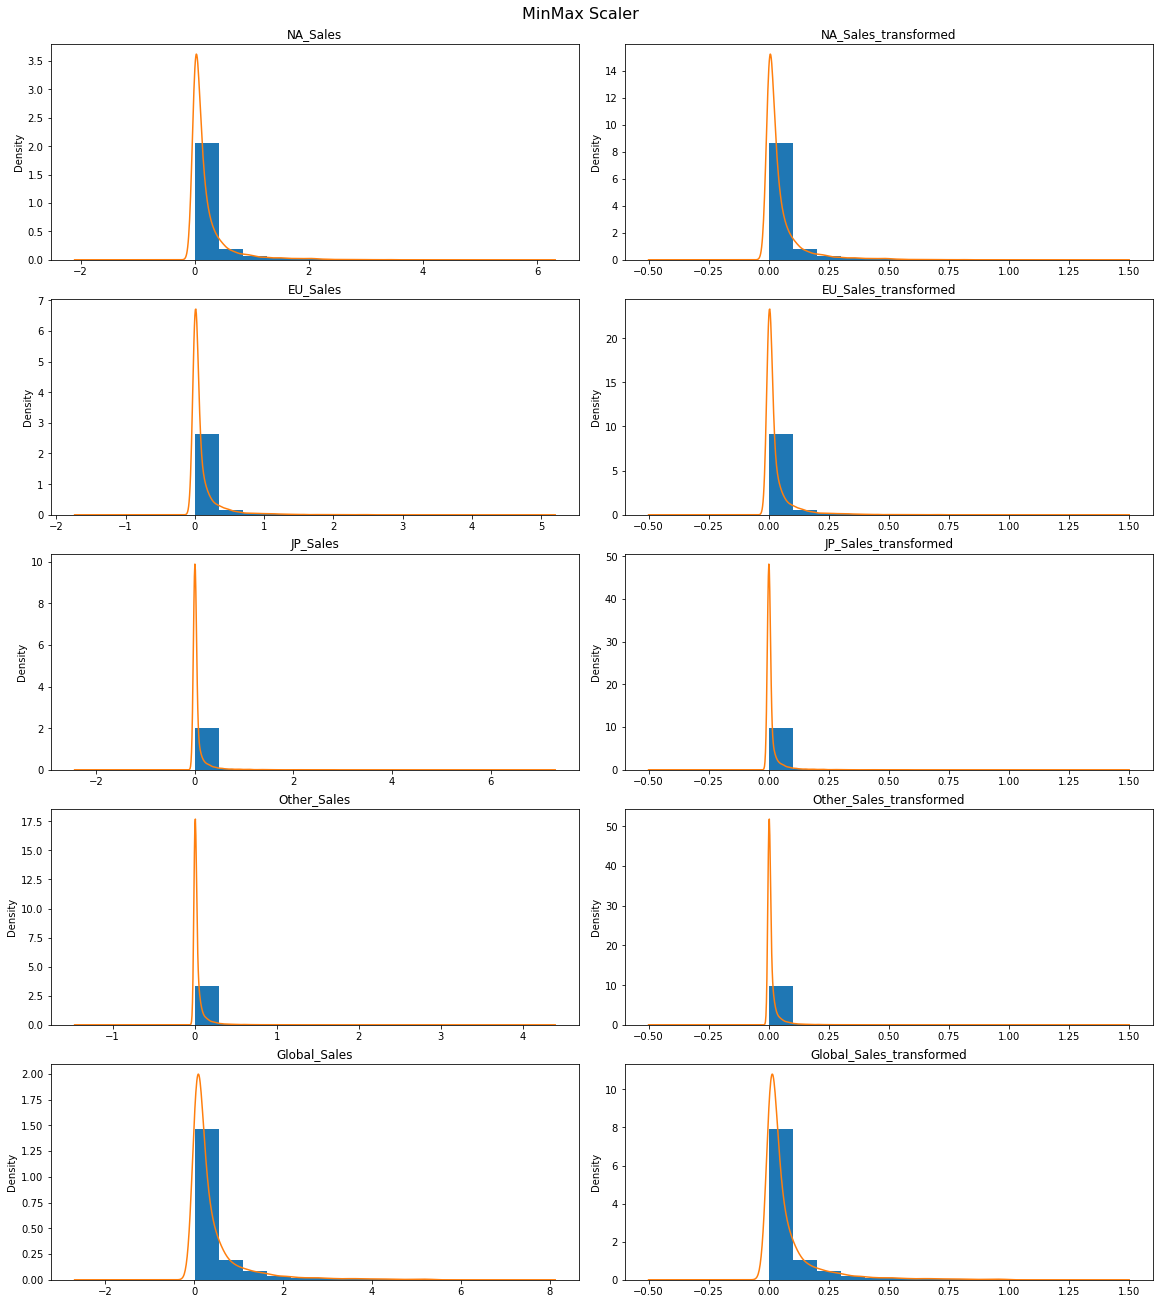

In [29]:
# Iteration 2 Part 2


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer

ndf = df_c.copy()

def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ndf[c].hist(ax=axs[i], density=True) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2
        
val_cols_names = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']

# transform the data
scaler = MinMaxScaler()
min_max_tdf = scaler.fit_transform(ndf)
min_max_tdf = pd.DataFrame(min_max_tdf, index=ndf.index, columns=ndf.columns)
plot_histograms_density(ndf, val_cols_names, min_max_tdf, 'MinMax Scaler')

Next, we have the MaxAbs scaler and the plots below show the effect of the scaler on our continous data. The effects of this scaler on our continous data is similar to the MinMax scaler and this scaling techniques is also susceptible to to skewness, therefore, we think this also is not a suitable technique for our data.

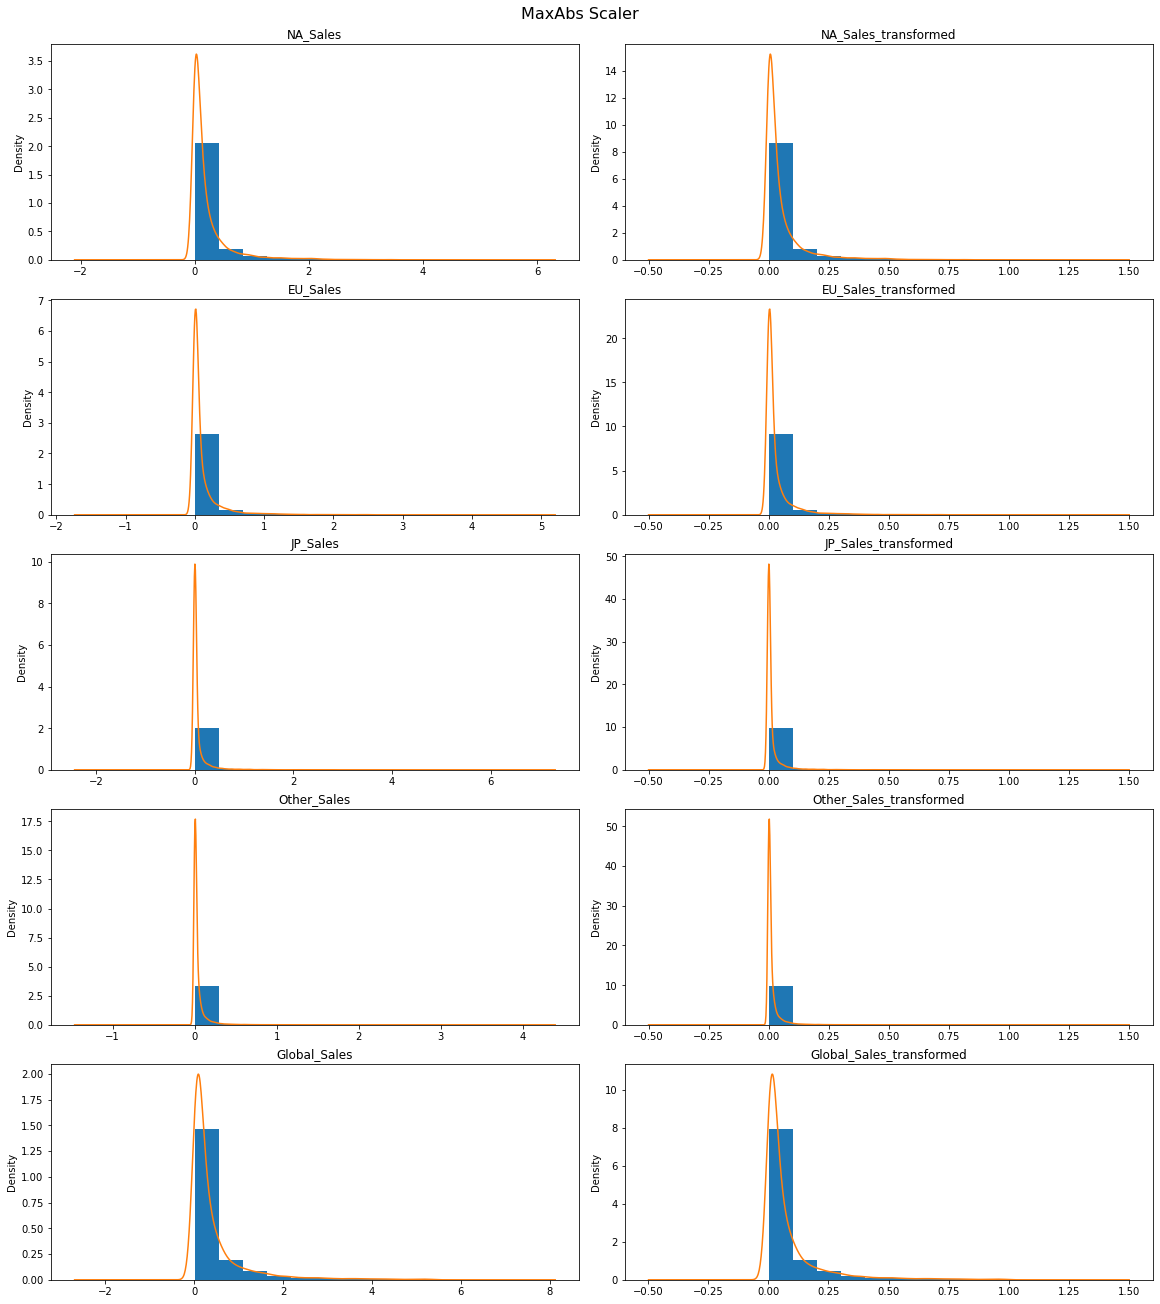

In [30]:
# Iteration 2 Part 2

# transform the data
scaler = MaxAbsScaler()
maxabs_tdf = scaler.fit_transform(ndf)
maxabs_tdf = pd.DataFrame(maxabs_tdf, index=ndf.index, columns=ndf.columns)

plot_histograms_density(ndf, val_cols_names, maxabs_tdf, 'MaxAbs Scaler')

Our next scaler is the robust scaler and the effects of the scaler are shown in the plot below. We believe that the results from this scaler can be used as this scaler has helped put all of our continous data is a similar range.

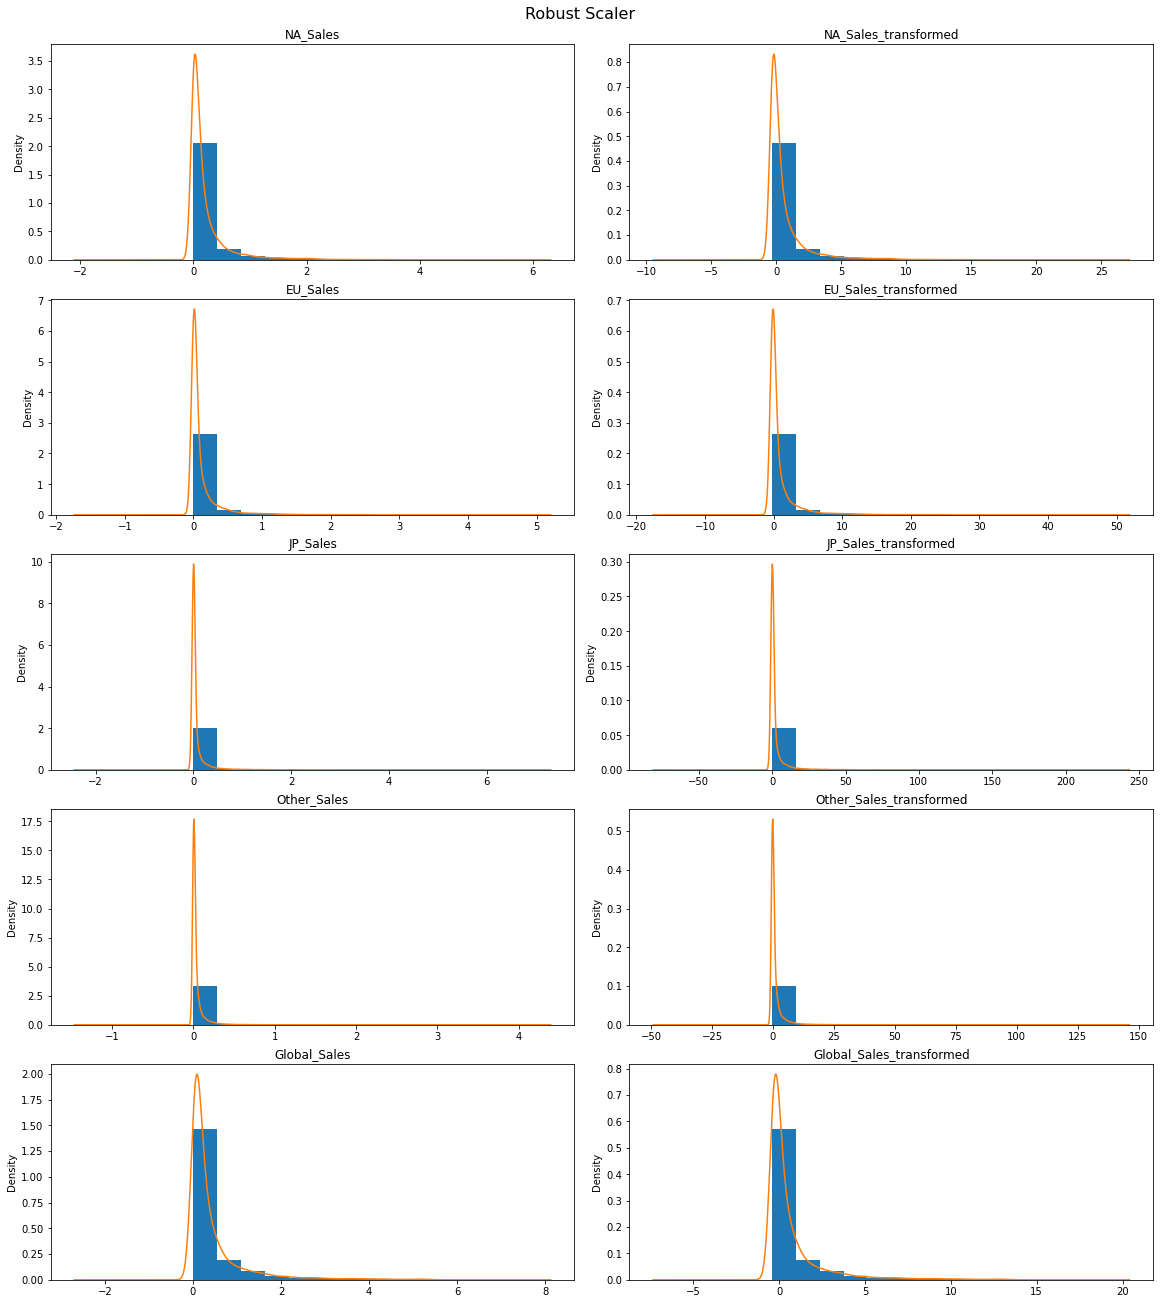

In [31]:
# Iteration 2 Part 2

# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(ndf)
robust_tdf = pd.DataFrame(robust_tdf, index=ndf.index, columns=ndf.columns)

plot_histograms_density(ndf, val_cols_names, robust_tdf, 'Robust Scaler')

Our next scaler is the quantile transformer. As apparent below, this scaler has transformer out skewed distribution to a normal to a sort of normal distribution.Out of all the scalers so far, this is also the scaler that is least affected by skewness, however, this scaler also has some disadvanteges as it distorts correlations and distances within and across each individual feature.

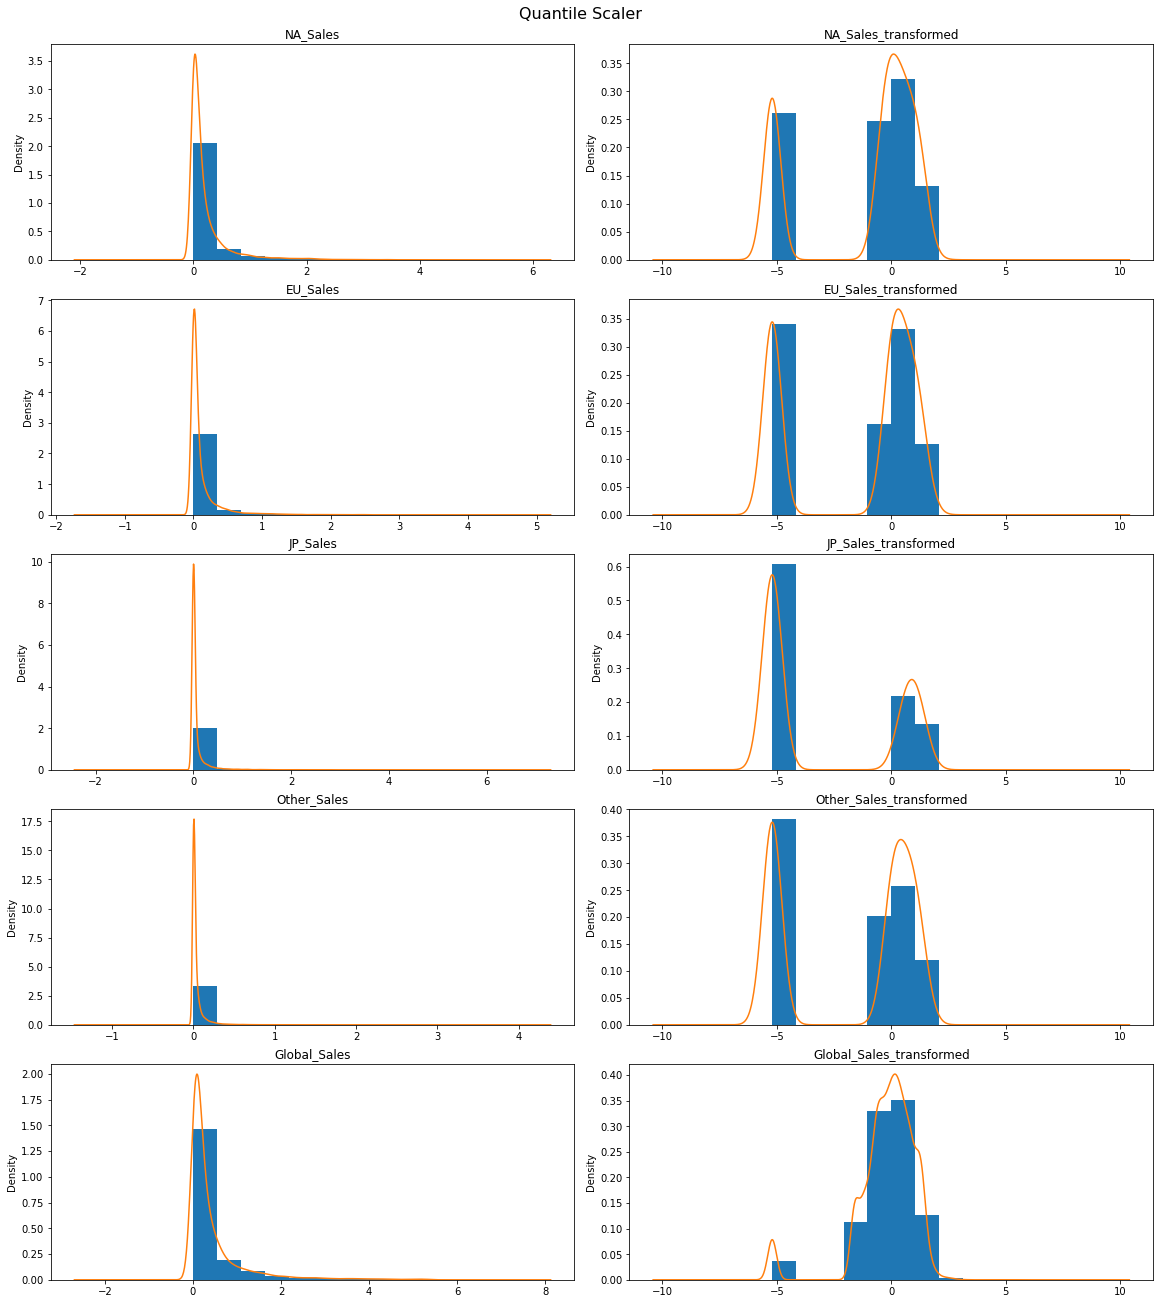

In [32]:
# Iteration 2 Part 2

# scaler = QuantileTransformer(n_quantiles=10, random_state=0)
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
qtl_tdf = scaler.fit_transform(ndf)
qtl_tdf = pd.DataFrame(qtl_tdf, index=ndf.index, columns=ndf.columns)

plot_histograms_density(ndf, val_cols_names, qtl_tdf, 'Quantile Scaler')

Our next scaler is is the Z-Score scaler. The affect of the scaler on the data can be seen below, however, even before looking at the after-scaler plot, we do not thick it is a good idea to use this scaler as our data does not follow a normal distribuiton.

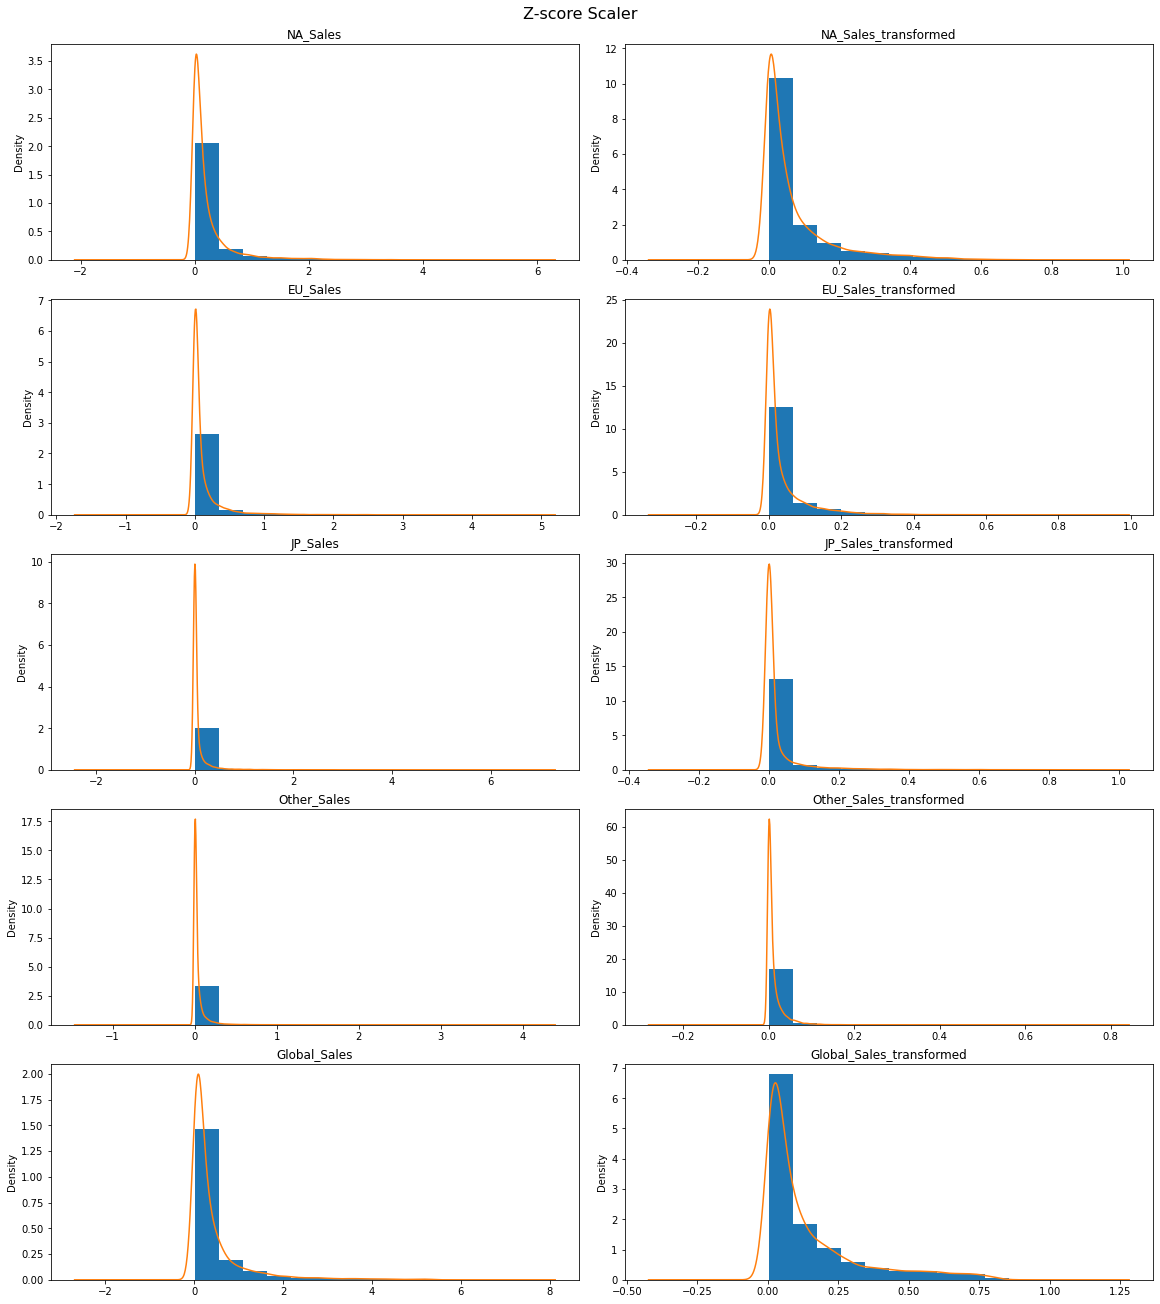

In [33]:
# Iteration 2 Part 2

scaler = Normalizer()
zscore_tdf = scaler.fit_transform(ndf)
zscore_tdf = pd.DataFrame(zscore_tdf, index=ndf.index, columns=ndf.columns)

plot_histograms_density(ndf, val_cols_names, zscore_tdf, 'Z-score Scaler')

Finally, we have the log transformer. As you can see below, this scaler has made our data more compact which make it more comparable and this scaler is also not affected by exteme values. 

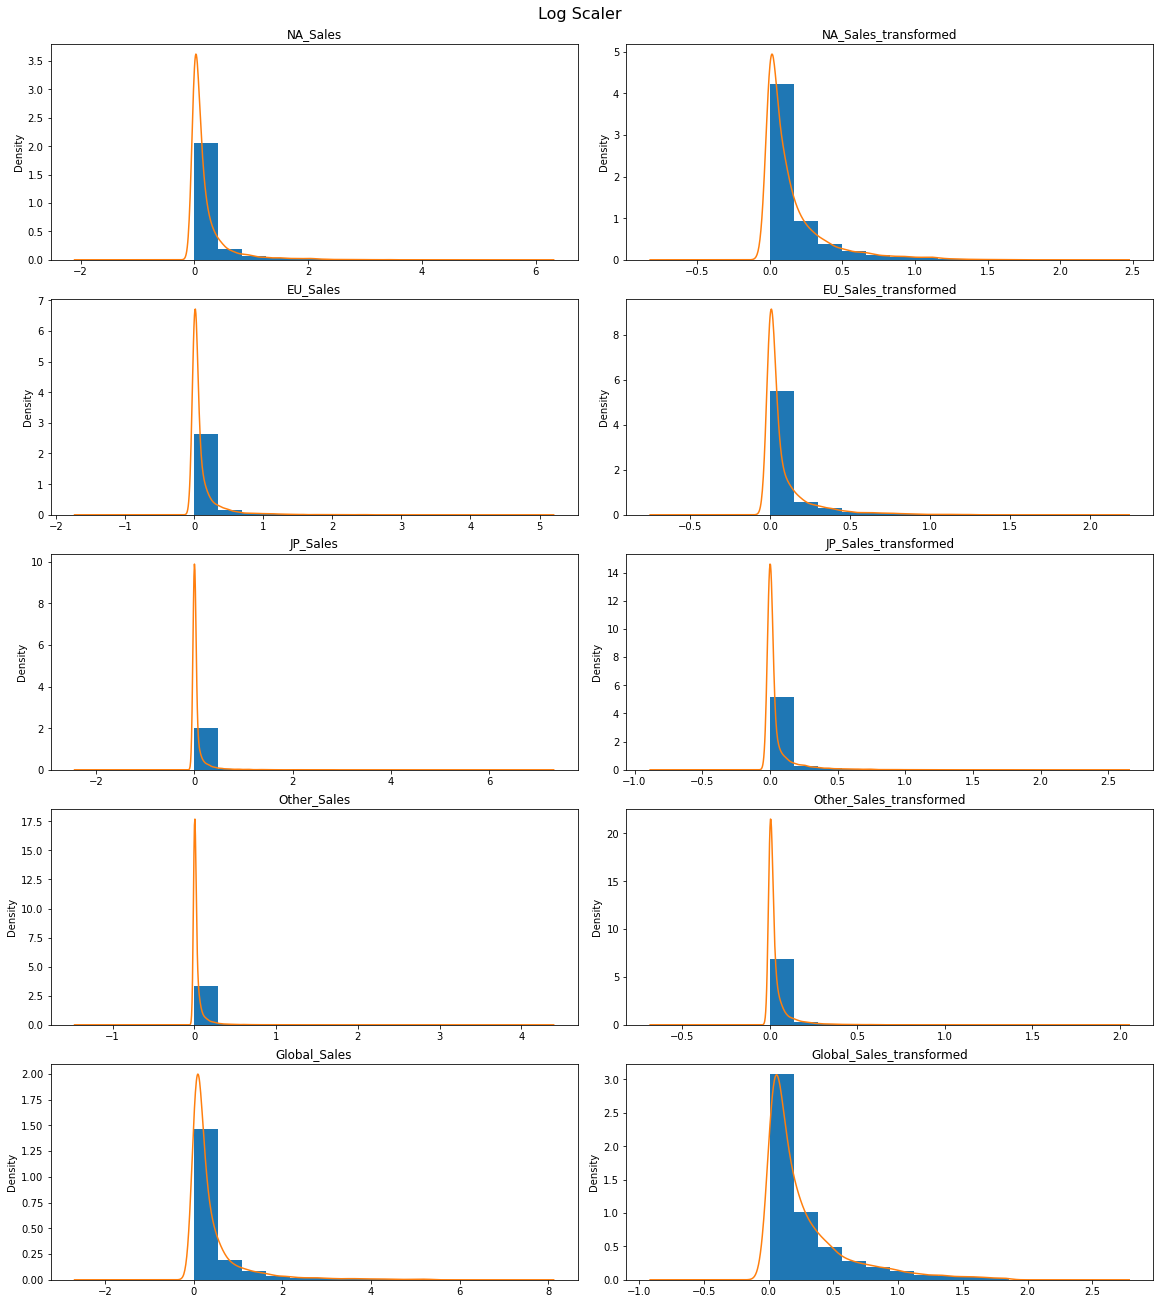

In [34]:
# Iteration 2 Part 2

scaler = FunctionTransformer(np.log1p)
log_tdf = scaler.fit_transform(ndf)
log_tdf = pd.DataFrame(log_tdf, index=ndf.index, columns=ndf.columns)

plot_histograms_density(ndf, val_cols_names, log_tdf, 'Log Scaler')

The plots below show the side by side comparison of the affects of all the scaling techniques on all of our continous data. After looking at the comparisons below and for the reasons discussed above, we believe that the best scalers for our data will be the robust scaler and the log scaler. The reasoning behind picking robust scaler is that it will keep our data in a similar range and is also the scaler most robust to skewness. As for the log transformer, the reason behind choosing it does not only make our data more compact thus making it more compatable but also it is the best way to deal with skewness as it is not affected by the extreme values in our data.

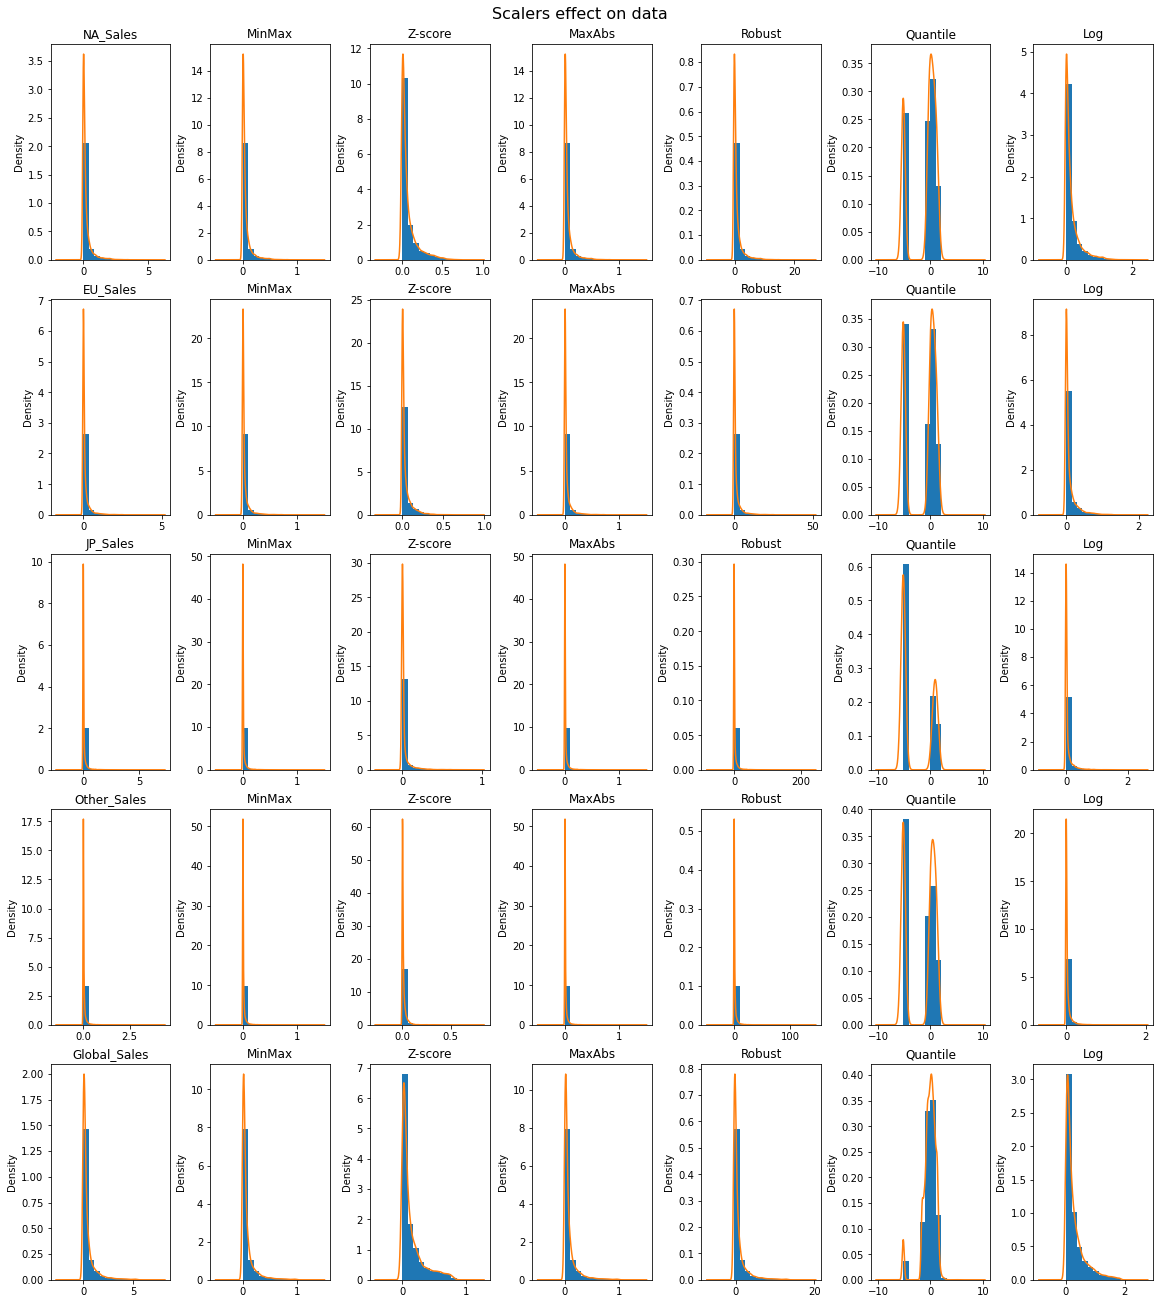

In [35]:
# Iteration 2 Part 2


def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ndf[c].hist(ax=axs[i], density=True) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(ndf, val_cols_names, 'Scalers effect on data', arr_scalers, scaler_names)

## Handling Missing Data and Outliers (Iteration 2 Part 3)

### Baseline Strategy and Modelling

After encoding our data and deciding our scaling techniques, it is now time for creating models, looking at the results and then deciding on the best model. We will run our models on three columns. The fisrt on is the "Global_Sales" column. Although, there are outliers in the regional sales columns, we think it is sufficient to just use the "Global_Sales" column to filter out and predict outliers because if a row is outlier in a regional sales column it will also be an outlier in the "Global_Sales" column. The other two columns are "Year Of Release" and "Publisher" column as those two are the only columns with missing values. 

Apart from the models, we will have a baseline strategy which will help us evaluate how good our results are. We have decided to use the DummyRegressor which will just use mean to predict the values. We decided on this very simple strategy because the results when compared with the other results will indicate whether our models are even worth using or not. 

As we will be predicting continoues data, we will be using some sort of Regressor as our modelling algorithm. The two algorithms we ended up deciding were the LinearRegressor and the KNeighborsRegressor. The reasoning for using linear regressor here is that we want to forecast values based on their relationship with the other features in the dataset and fitting linear regression in a predictive model can help us achieve that. The reasoning for using KN Neighbours Regressor is that it uses feature similarity to predict values and that can help us predict values accurately. For instance, if an instance with missing data has features similar to an instance with high amount of sales, it is very likely that the instance with missing data will also have high sales. 

Finally, for our evaluation metric we will be using MAE(Mean Absolute Error). As we have established that our data is skewed and this evaluation metric is somewhat robust to skewness. Apart from that the results from this evaluation metric are in the same unit as our output variable therefore it will be easy to compare on average how far our actual value is from the predicted value. 

#### Modelling for Global_Sales

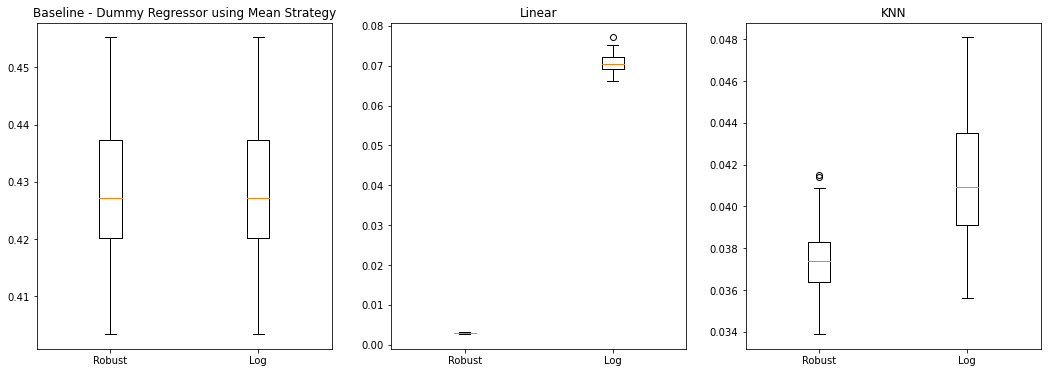

In [36]:
# Iteration 2 Part 3


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

##Dummy

## Scalers that we will be using
scaler_names = ['Robust', 'Log']
arr_scalers = [RobustScaler(), FunctionTransformer(np.log1p)]
results_dummy = {}

## Our model
model_dummy = DummyRegressor()

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Global_Sales'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is variable that we want to forecast
    y = df_c['Global_Sales'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_dummy, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_dummy[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res = pd.DataFrame(results_dummy)

##Linear
model_linear = LinearRegression()
results_linear = {}


for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Global_Sales'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is variable that we want to forecast
    y = df_c['Global_Sales'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_linear, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_linear[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res1 = pd.DataFrame(results_linear)

##KNN
model_knn = KNeighborsRegressor(n_neighbors=3)
results_knn = {}


for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Global_Sales'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is variable that we want to forecast
    y = df_c['Global_Sales'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_knn, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_knn[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res2 = pd.DataFrame(results_knn)


fig, axs = plt.subplots(1,3,figsize=(18,6))
axs = axs.flatten()
axs[0].boxplot(df_res, labels = scaler_names)
axs[0].set_title('Baseline - Dummy Regressor using Mean Strategy')

axs[1].boxplot(df_res1, labels = scaler_names)
axs[1].set_title('Linear')

axs[2].boxplot(df_res2, labels = scaler_names)
axs[2].set_title('KNN')

plt.show()

The three plots above show the results of using our modelling algorithms along with our scaling tecnhniques. As we can see our baseline strategy gets an MAE of around 0.43 with both of our scalers. Fortunately, our models fetch better results. As evident in the second and third plot, Robust scaler is the better scaler to use. Both of our modelling algorithms when used with robust scaler give acceptable results, however, Linear Regressor gives as almost perfect results with negligible MAE.

#### Modelling for Publisher

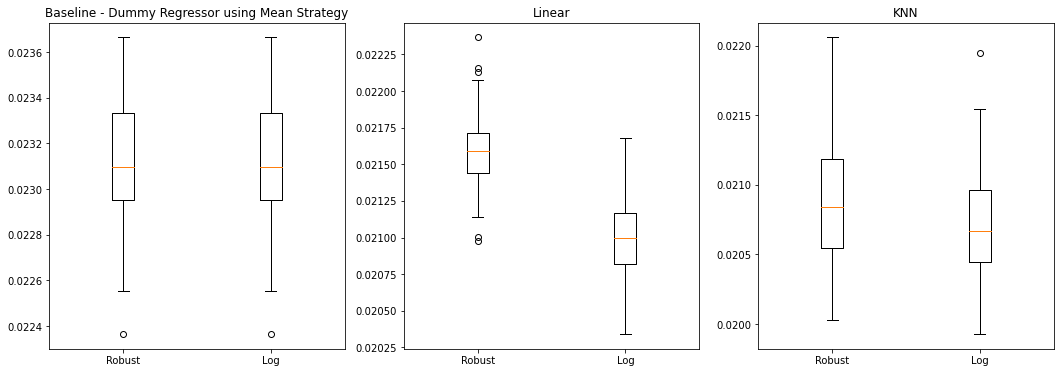

In [37]:
# Iteration 2 Part 3

##Dummy
scaler_names = ['Robust', 'Log']
arr_scalers = [RobustScaler(), FunctionTransformer(np.log1p)]
results_dummy = {}
model_dummy = DummyRegressor()

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['publisher_frequency'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['publisher_frequency'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_dummy, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_dummy[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res = pd.DataFrame(results_dummy)

##Linear
model_linear = LinearRegression()

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['publisher_frequency'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['publisher_frequency'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_linear, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_linear[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res1 = pd.DataFrame(results_linear)


##KNN
model_knn = KNeighborsRegressor(n_neighbors=3)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['publisher_frequency'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['publisher_frequency'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_knn, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_knn[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res2 = pd.DataFrame(results_knn)


fig, axs = plt.subplots(1,3,figsize=(18,6))
axs = axs.flatten()
axs[0].boxplot(df_res, labels = scaler_names)
axs[0].set_title('Baseline - Dummy Regressor using Mean Strategy')

axs[1].boxplot(df_res1, labels = scaler_names)
axs[1].set_title('Linear')

axs[2].boxplot(df_res2, labels = scaler_names)
axs[2].set_title('KNN')

plt.show()

The three plots above show the results of using our modelling algorithms along with our scaling tecnhniques when predicting publisher. As we can see our baseline strategy gets an MAE of around 0.0232 with both of our scalers. Fortunately, our models fetch slightly better results. As evident in the second and third plot, LOG scaler is the better scaler to use. Both of our modelling algorithms when used with log scaler give almost perfect results, however, Linear Regressor gives slightly better results with MAE of just around 0.0210.

#### Modelling for Year Of Release

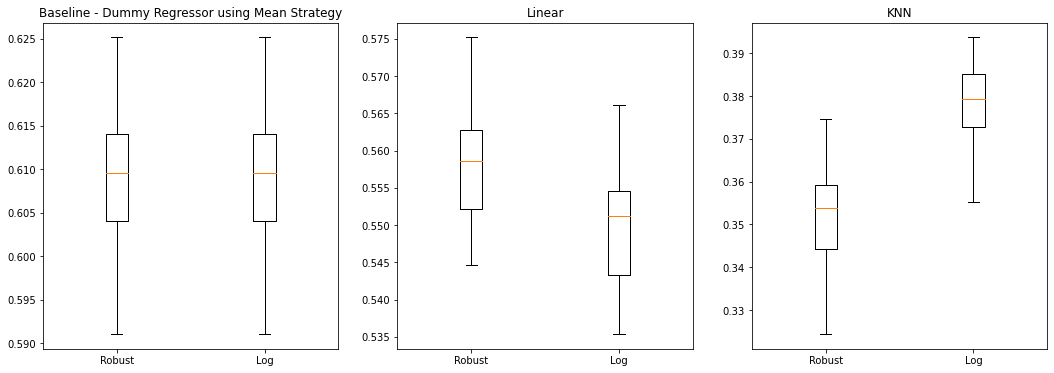

In [38]:
# Iteration 2 Part 3


##Dummy
scaler_names = ['Robust', 'Log']
arr_scalers = [RobustScaler(), FunctionTransformer(np.log1p)]
results_dummy = {}
model_dummy = DummyRegressor()

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Year_of_Release'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['Year_of_Release'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_dummy, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_dummy[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res = pd.DataFrame(results_dummy)

##Linear
model_linear = LinearRegression()

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Year_of_Release'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['Year_of_Release'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_linear, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_linear[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res1 = pd.DataFrame(results_linear)


##KNN
model_knn = KNeighborsRegressor(n_neighbors=3)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = df_c.drop(['Year_of_Release'], axis=1).to_numpy()
    X_t = arr_scalers[i].fit_transform(X)
    # y is NOX that we want to forecast
    y = df_c['Year_of_Release'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model_knn, X_t, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results_knn[scaler_names[i]] = [abs(elem) for elem in scores]
    

df_res2 = pd.DataFrame(results_knn)


fig, axs = plt.subplots(1,3,figsize=(18,6))
axs = axs.flatten()
axs[0].boxplot(df_res, labels = scaler_names)
axs[0].set_title('Baseline - Dummy Regressor using Mean Strategy')

axs[1].boxplot(df_res1, labels = scaler_names)
axs[1].set_title('Linear')

axs[2].boxplot(df_res2, labels = scaler_names)
axs[2].set_title('KNN')

plt.show()

The three plots above show the results of using our modelling algorithms along with our scaling tecnhniques for Year of Release. As we can see our baseline strategy gets an MAE of around 0.44 with both of our scalers. Fortunately, one of our modeles fetches better results. As evident in the second and third plot, Robust scaler is the better scaler to use, however, only pairing it with KN Neighbour regressor gives us a better result than the baseline strategy with a MAE of around 0.31. KN Neigbour Regressor is the best one to use as the results from the linear regressor are similar to our baseline strategy.

#### Replacing Missing Values and Outliers with Predictied Values

##### Predicting and Replacing Missing Values

We will all the rows with missing value in a variable below and work on that variable to predict the values before adding it back to our dataset.

In [39]:
# Iteration 2 Part 3

## Storing rows with missing values.
missing_value_rows = df[df.isna().any(axis=1)].copy()

As seen above we have missing values in two columns. We will first properly encode and scale our data before predicting values for bothe columns individually using our model.

In [40]:
# Iteration 2 Part 3


## Using label encoder
encoder = LabelEncoder() 

## Binning the values in this columns before encoding
missing_value_rows['Year_of_Release'] = pd.cut(missing_value_rows['Year_of_Release'], 4)
## Encoding this column
missing_value_rows['Year_of_Release'] = encoder.fit_transform(missing_value_rows['Year_of_Release'])

## Using frequncy encoding to encode the publisher column
publisher_frequency = ((missing_value_rows.groupby('Publisher').size())/len(df_c))
missing_value_rows['publisher_frequency'] = missing_value_rows['Publisher'].apply(lambda x : publisher_frequency[x] if type(x)==str else x)

## Using frequncy encoding to encode the platform column
platform_frequency = ((missing_value_rows.groupby('Platform').size())/len(df_c))
missing_value_rows['platform_frequency'] = missing_value_rows['Platform'].apply(lambda x : platform_frequency[x] if type(x)==str else x)

## One-hot encoding for genre column
cat = ['Genre']
missing_value_rows = pd.get_dummies(missing_value_rows, columns = cat, drop_first = False)

## Removing columns that we have encoded or don't need for modelling
del missing_value_rows['Name']
del missing_value_rows['Publisher']
del missing_value_rows['Platform']


missing_value_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 2 to 16714
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_of_Release      2747 non-null   int32  
 1   NA_Sales             2747 non-null   float64
 2   EU_Sales             2747 non-null   float64
 3   JP_Sales             2747 non-null   float64
 4   Other_Sales          2747 non-null   float64
 5   Global_Sales         2747 non-null   float64
 6   publisher_frequency  1397 non-null   float64
 7   platform_frequency   2747 non-null   float64
 8   Genre_Action         2747 non-null   uint8  
 9   Genre_Adventure      2747 non-null   uint8  
 10  Genre_Fighting       2747 non-null   uint8  
 11  Genre_Misc           2747 non-null   uint8  
 12  Genre_Platform       2747 non-null   uint8  
 13  Genre_Puzzle         2747 non-null   uint8  
 14  Genre_Racing         2747 non-null   uint8  
 15  Genre_Role-Playing   2747 non-null   

The info above shows that all the features match the features in our main dataset. Therefore, now we can take our model and train it on over training data(df_c) to predict the values below. After modelling and predicting we will finally append these rows back to our data set.

In [41]:
# Iteration 2 Part 3

## Storing our scaler and algorithm in variables
scl = RobustScaler()
model_year = KNeighborsRegressor(n_neighbors=3)
model_publisher = LinearRegression()

## Preparing and scaling our data for modelling
X = df_c.drop(['Year_of_Release', 'publisher_frequency'], axis=1).to_numpy()
X_t = scl.fit_transform(X)
y1 =  df_c['Year_of_Release'].to_numpy()
y2 =  df_c['publisher_frequency'].to_numpy()

## Running our model and predicting our values
model_year.fit(X_t, y1)
model_publisher.fit(X_t, y2)
X_pred = scl.fit_transform(missing_value_rows.drop(['Year_of_Release', 'publisher_frequency'], axis=1).to_numpy())
y1_pred = model_year.predict(X_pred)
y2_pred = model_publisher.predict(X_pred)

## Putting the predicted values in the outliers rows
missing_value_rows['Year_of_Release'] = y1_pred
missing_value_rows['publisher_frequency'] = y2_pred

df_c = df_c.append(missing_value_rows).reset_index()

C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\733519987.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c = df_c.append(missing_value_rows).reset_index()


##### Predicting and Replacing Outliers

We will now predict values for rows that had outliers, however, before we can do that, we need to encode the outlier rows.

In [42]:
# Iteration 2 Part 3

## Using label encoder
encoder = LabelEncoder() 

## Binning the values in this columns before encoding
outliers['Year_of_Release'] = pd.cut(outliers['Year_of_Release'], 4)

## Encoding this column
outliers['Year_of_Release'] = encoder.fit_transform(outliers['Year_of_Release'])

## Using frequncy encoding to encode the publisher column
publisher_frequency = ((outliers.groupby('Publisher').size())/len(df_c))
outliers['publisher_frequency'] = outliers['Publisher'].apply(lambda x : publisher_frequency[x] if type(x)==str else x)

## Using frequncy encoding to encode the platform column
platform_frequency = ((outliers.groupby('Platform').size())/len(df_c))
outliers['platform_frequency'] = outliers['Platform'].apply(lambda x : platform_frequency[x] if type(x)==str else x)

## One-hot encoding for genre column
cat = ['Genre']
outliers = pd.get_dummies(outliers, columns = cat, drop_first = False)

## Removing columns that we have encoded or don't need for modelling
del outliers['Name']
del outliers['Publisher']
del outliers['Platform']

outliers = outliers.dropna(subset=['publisher_frequency'])

## Putting the rows back to our dataset
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 33 to 16706
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_of_Release      800 non-null    int32  
 1   NA_Sales             800 non-null    float64
 2   EU_Sales             800 non-null    float64
 3   JP_Sales             800 non-null    float64
 4   Other_Sales          800 non-null    float64
 5   Global_Sales         800 non-null    float64
 6   publisher_frequency  800 non-null    float64
 7   platform_frequency   800 non-null    float64
 8   Genre_Action         800 non-null    uint8  
 9   Genre_Adventure      800 non-null    uint8  
 10  Genre_Fighting       800 non-null    uint8  
 11  Genre_Misc           800 non-null    uint8  
 12  Genre_Platform       800 non-null    uint8  
 13  Genre_Puzzle         800 non-null    uint8  
 14  Genre_Racing         800 non-null    uint8  
 15  Genre_Role-Playing   800 non-null    

C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\1207957137.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Year_of_Release'] = pd.cut(outliers['Year_of_Release'], 4)
C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\1207957137.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Year_of_Release'] = encoder.fit_transform(outliers['Year_of_Release'])
C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\1207957137.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

The info above shows that all the features match the features in our main dataset. Therefore, now we can take our model and train it on over training data(df_c) to predict the values below. After modelling and predicting we will finally append these rows back to our data set.

In [43]:
# Iteration 2 Part 3

## Storing our scaler and algorithm in variables
scl1 = RobustScaler()
model = LinearRegression()
 
## Preparing and scaling our data for modelling
X = df_c.drop(['Global_Sales'], axis=1).to_numpy()
X_t = scl1.fit_transform(X)
y =  df_c['Global_Sales'].to_numpy()

## Running our model and predicting our values
model.fit(X_t, y)
X_pred = scl1.fit_transform(outliers.to_numpy())
y_pred = model.predict(X_pred)

## Putting the predicted values in the outliers rows
outliers['Global_Sales'] = y_pred

## Putting the rows back to our dataset
df_c = df_c.append(outliers).reset_index()

C:\Users\Sameer\AppData\Local\Temp\ipykernel_11700\1756941033.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c = df_c.append(outliers).reset_index()
